In [ ]:
from google.colab import drive
drive.mount("/content/drive")

**Analysis of Uber drives in 2016**

**Content**

Geography: USA, Sri Lanka and Pakistan

Time period: January - December 2016

Unit of analysis: Drives

***Total Drives: 1,155***

Total Miles: 12,204

***Dataset:*** The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)

[https://www.kaggle.com/zusmani/uberdrives](https://www.kaggle.com/zusmani/uberdrives)

**This project aims to analyse:** 

*   ***Average number of rides per week or per month***
*   ***Purpose of the trip***
*   ***Trips per hour in a  day.***
*   ***Number of Trips taking place during months.***
*   ***Weekday where people having trip***
*   ***The starting trip place***







**Import packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
matplotlib.style.use('ggplot')
import calendar

**Load dataset**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Uber_Drives.csv")

In [ ]:
print(df.head(5))

      START_DATE*       END_DATE*  ... MILES*         PURPOSE*
0  1/1/2016 21:11  1/1/2016 21:17  ...    5.1   Meal/Entertain
1   1/2/2016 1:25   1/2/2016 1:37  ...    5.0              NaN
2  1/2/2016 20:25  1/2/2016 20:38  ...    4.8  Errand/Supplies
3  1/5/2016 17:31  1/5/2016 17:45  ...    4.7          Meeting
4  1/6/2016 14:42  1/6/2016 15:49  ...   63.7   Customer Visit

[5 rows x 7 columns]


**Data exploration**

In [ ]:
# Check number of columns
print(df.columns)

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


In [ ]:
print(df.dtypes)

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object


In [ ]:
# Check number of rows and columns 
print(df.shape)

(1156, 7)


In [ ]:
#Information on the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [ ]:
#Rename columns
df.columns =['Start_date', 'End_date', 'Category','Start','Stop', 'Miles','Purpose']

**Missing values**

In [ ]:
#Check missing values
print(df.isnull())

      Start_date  End_date  Category  Start   Stop  Miles  Purpose
0          False     False     False  False  False  False    False
1          False     False     False  False  False  False     True
2          False     False     False  False  False  False    False
3          False     False     False  False  False  False    False
4          False     False     False  False  False  False    False
...          ...       ...       ...    ...    ...    ...      ...
1151       False     False     False  False  False  False    False
1152       False     False     False  False  False  False    False
1153       False     False     False  False  False  False    False
1154       False     False     False  False  False  False    False
1155       False      True      True   True   True  False     True

[1156 rows x 7 columns]


In [ ]:
print(df.isnull().sum())

Start_date      0
End_date        1
Category        1
Start           1
Stop            1
Miles           0
Purpose       503
dtype: int64


In [ ]:
#The field PURPOSE* has nan values. Replace it by category "Other" and drop the others values
df['Purpose'].unique()
df['Purpose'].replace(np.nan, 'Other', inplace=True)
df = df.dropna()

In [ ]:
#Recheck missing value
print(df.isna().sum())

Start_date    0
End_date      0
Category      0
Start         0
Stop          0
Miles         0
Purpose       0
dtype: int64


**Duplicates values**

In [ ]:
# We have one duplicate value
print(df.duplicated().sum())

1


In [ ]:
# delete duplicate value
df.drop_duplicates().sum()

Start_date    1/1/2016 21:111/2/2016 1:251/2/2016 20:251/5/2...
End_date      1/1/2016 21:171/2/2016 1:371/2/2016 20:381/5/2...
Category      BusinessBusinessBusinessBusinessBusinessBusine...
Start         Fort PierceFort PierceFort PierceFort PierceFo...
Stop          Fort PierceFort PierceFort PierceFort PierceWe...
Miles                                                   12194.8
Purpose       Meal/EntertainOtherErrand/SuppliesMeetingCusto...
dtype: object

In [ ]:
print(df.shape)

(1155, 7)


**Convert datetime and add some useful colomn**

In [ ]:
# START DATE and END_DATE have string format. Convert it to datetime object
df['Start_date'] = df['Start_date'].map(pd.to_datetime)
df['End_date'] = df['End_date'].map(pd.to_datetime)

In [ ]:
print(df.head(5))

           Start_date            End_date  ... Miles          Purpose
0 2016-01-01 21:11:00 2016-01-01 21:17:00  ...   5.1   Meal/Entertain
1 2016-01-02 01:25:00 2016-01-02 01:37:00  ...   5.0            Other
2 2016-01-02 20:25:00 2016-01-02 20:38:00  ...   4.8  Errand/Supplies
3 2016-01-05 17:31:00 2016-01-05 17:45:00  ...   4.7          Meeting
4 2016-01-06 14:42:00 2016-01-06 15:49:00  ...  63.7   Customer Visit

[5 rows x 7 columns]


In [ ]:
def get_dom(dt):
  return dt.day
df['Day']= df['Start_date'].map(get_dom)

def get_weekday(dt):
  return dt.weekday()
df['Weekday'] = df['Start_date'].map(get_weekday)

In [ ]:
def get_hour(dt):
  return dt.hour
df['Hour'] = df['Start_date'].map(get_hour)

def get_month(dt):
  return dt.month
df['Month'] = df['Start_date'].map(get_month)

In [ ]:
print(df.head(5))

           Start_date            End_date  Category  ... Hour Month  Travel_time
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  ...   21     1          6.0
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  ...    1     1         12.0
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  ...   20     1         13.0
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  ...   17     1         14.0
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  ...   14     1         67.0

[5 rows x 12 columns]


**Calculate travel time**

In [ ]:
time=[]
df['Travel_time']= df['End_date']-df['Start_date']
for i in df['Travel_time']:
    time.append(i.seconds/60)
df['Travel_time']=time
print(df.head())

           Start_date            End_date  Category  ... Hour Month  Travel_time
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  ...   21     1          6.0
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  ...    1     1         12.0
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  ...   20     1         13.0
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  ...   17     1         14.0
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  ...   14     1         67.0

[5 rows x 12 columns]


In [ ]:
# Now we 12 columns
print(df.shape)

(1155, 12)


# **Data visualization**

**Analyse of category** 

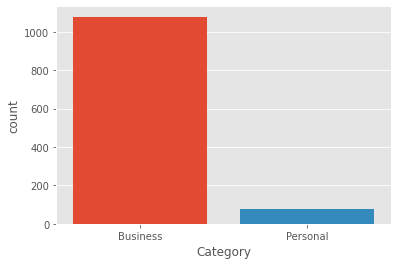

In [ ]:
# Different categorie of data
# we can see that most of the people use UBER for business purpose.
sns.countplot(x='Category', data=df, saturation=5, dodge=False)

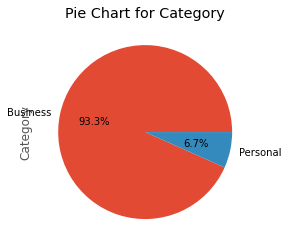

In [ ]:
# Plot a pie chart to see the percentage of purpose
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False, figsize=(6,4))
plt.title('Pie Chart for Category')
plt.show()

**Analyse of day of the month**

Text(0.5, 1.0, 'Frequency by day of the month')

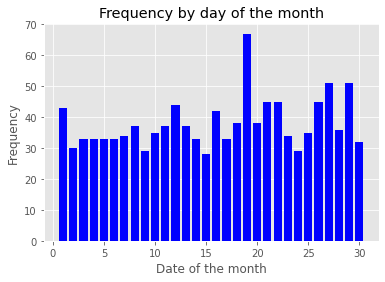

In [ ]:
plt.hist(x='Day',bins=30, rwidth=.8, range=(0.5, 30.5),data=df, color='blue')
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by day of the month')

**Analyse of hour**

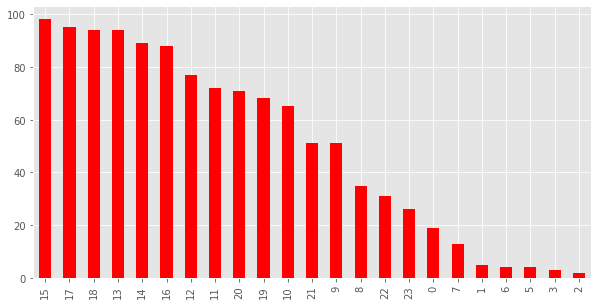

In [ ]:
# Trips per hour of the day.
df['Hour'].value_counts().plot(kind='bar',figsize=(10,5),color='red')

**Analyse of weekday**

''

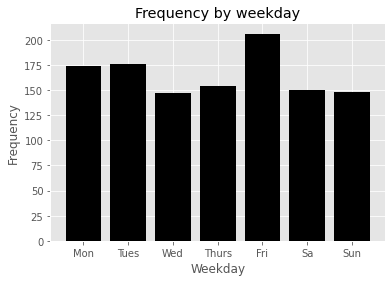

In [ ]:
plt.hist(df.Weekday, bins=7, rwidth=.8, range=(-.5,6.5), color='black')
plt.xticks(range(7), 'Mon Tues Wed Thurs Fri Sa Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Frequency by weekday')
;

**Cross analysis weekday & hour**

In [ ]:
by_cros = df.groupby(['Weekday', 'Hour'] )['Hour'].count().unstack()

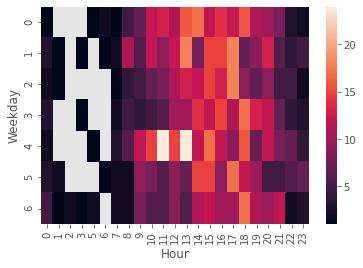

In [ ]:
sns.heatmap(by_cros)

**Analyse of month**

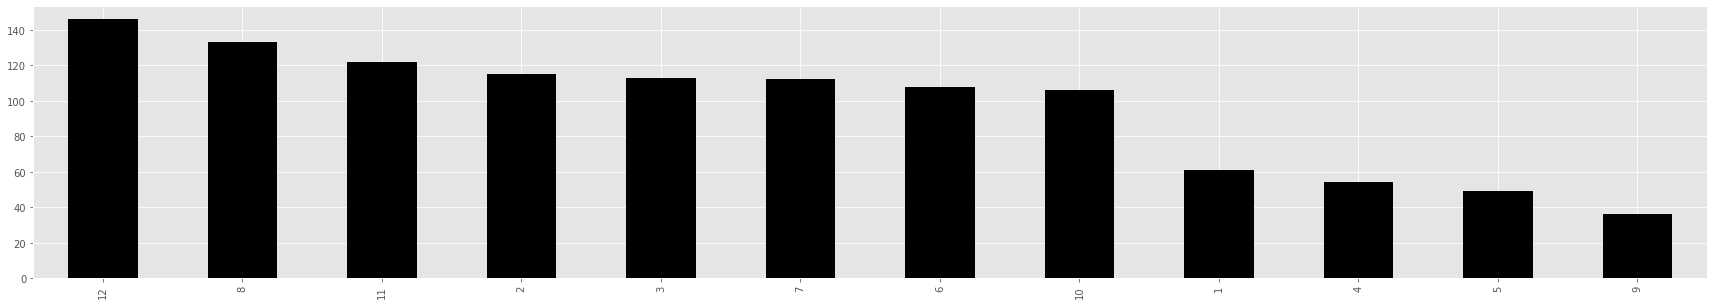

In [ ]:
# Trips base on month
df['MONTH'].value_counts().plot(kind='bar',figsize=(30,5),color='black')

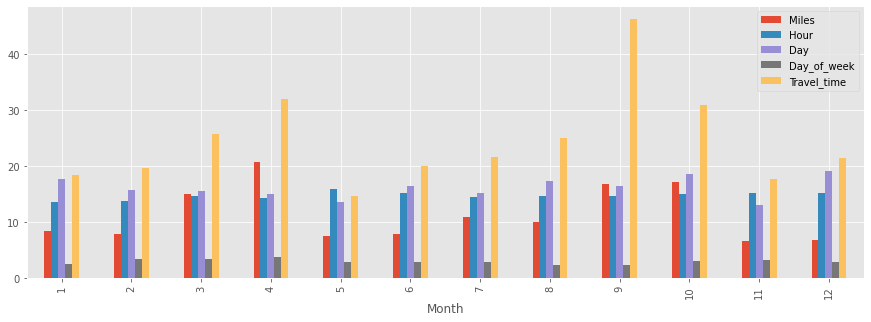

In [ ]:
df.groupby('Month' ).mean().plot(kind='bar',figsize=(15,5))

**Analyse of purpose**

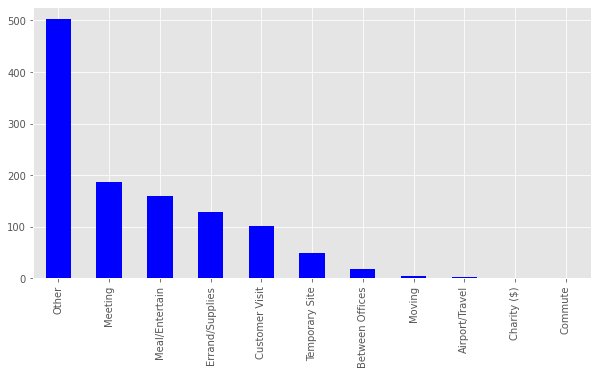

In [ ]:
# Purpose of the trip
df['Purpose'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

**Analyse of starting point**

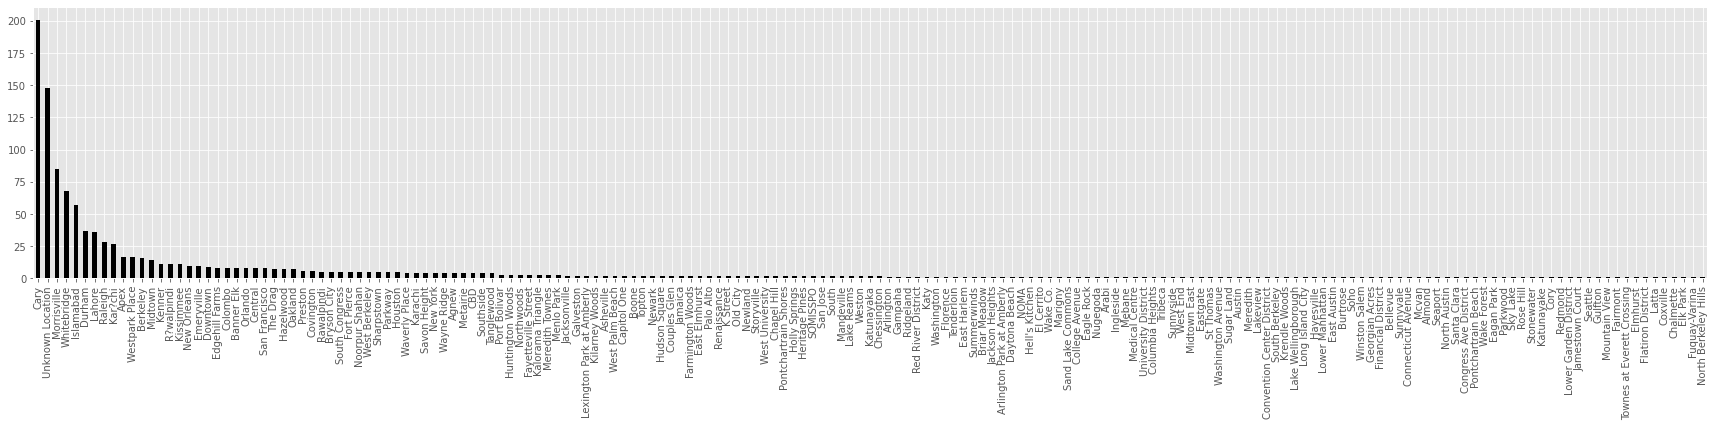

In [ ]:
# The starting points of trips.
df['START*'].value_counts().plot(kind='bar',figsize=(30,5),color='black')

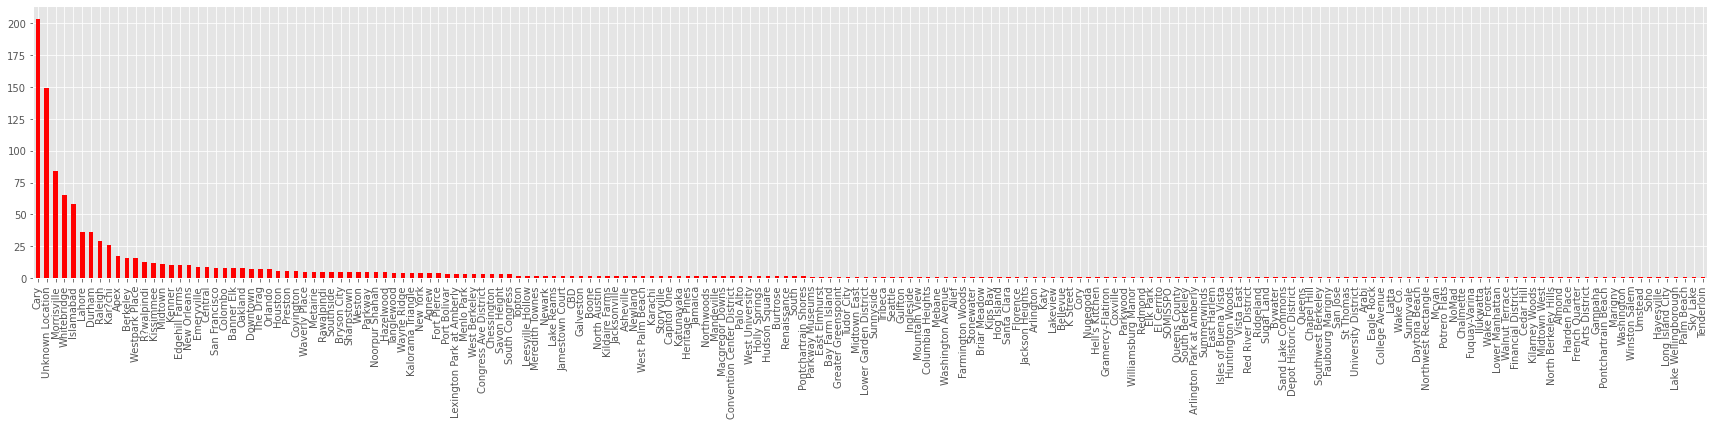

In [ ]:
# The end points of trips.
df['STOP*'].value_counts().plot(kind='bar',figsize=(30,5),color='red')